<a href="https://colab.research.google.com/github/mks2607/Data_Scientist/blob/mks2607/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv('/content/Spotify Most Streamed Songs.csv')

In [97]:
df.head(3)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...


In [98]:
df.tail(3)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,E,Minor,61,32,67,15,0,11,5,https://i.scdn.co/image/ab67616d0000b273992a1f...


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [100]:
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '.', regex=False)

In [101]:
df['in_shazam_charts'] = df['in_shazam_charts'].astype(float)

In [102]:
df.fillna(0, inplace=True)

In [103]:
df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)

In [104]:
df['in_shazam_charts'].head(5)

,in_shazam_charts
0,826
1,382
2,949
3,548
4,425


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

In [106]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,48.122770,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,123.239504,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,32.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,953.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [107]:
df.head(3)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...


In [108]:
print(df.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')


In [109]:
columns_list = df.columns.tolist()
print(columns_list)

['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'cover_url']


In [110]:
df.loc[49]

,49
track_name,Die For You - Remix
artist(s)_name,"Ariana Grande, The Weeknd"
artist_count,2
released_year,2023
released_month,2
released_day,24
in_spotify_playlists,3408
in_spotify_charts,47
streams,518745108
in_apple_playlists,87


In [111]:
df.iloc[49]

,49
track_name,Die For You - Remix
artist(s)_name,"Ariana Grande, The Weeknd"
artist_count,2
released_year,2023
released_month,2
released_day,24
in_spotify_playlists,3408
in_spotify_charts,47
streams,518745108
in_apple_playlists,87


In [112]:
relize_df = (df[df['released_year'] < 2000])

In [113]:
relize_df.head(3)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
65,Yellow,Chris Molitor,1,1999,1,1,31358,43,1755214421,196,...,B,Major,43,28,66,0,0,23,3,https://i.scdn.co/image/ab67616d0000b273be011d...
80,Riptide,Vance Joy,1,1975,1,1,31123,55,2009094673,300,...,C#,Major,48,50,73,43,0,15,4,https://i.scdn.co/image/ab67616d0000b273a9929d...
114,Everybody Wants To Rule The World,Tears For Fears,1,1985,2,17,41751,25,1205951614,101,...,G,Major,64,54,81,36,0,11,6,https://i.scdn.co/image/ab67616d0000b27322463d...


In [114]:
relize_df = relize_df.drop(columns=['in_deezer_charts', 'in_shazam_charts', 'bpm','key', 'mode', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','cover_url'])

In [115]:
relize_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 65 to 922
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            49 non-null     object
 1   artist(s)_name        49 non-null     object
 2   artist_count          49 non-null     int64 
 3   released_year         49 non-null     int64 
 4   released_month        49 non-null     int64 
 5   released_day          49 non-null     int64 
 6   in_spotify_playlists  49 non-null     int64 
 7   in_spotify_charts     49 non-null     int64 
 8   streams               49 non-null     object
 9   in_apple_playlists    49 non-null     int64 
 10  in_apple_charts       49 non-null     int64 
 11  in_deezer_playlists   49 non-null     object
dtypes: int64(8), object(4)
memory usage: 5.0+ KB


### Удалили лишние колонки - дальше строить сводные таблицы и визуализировать для анализа.

In [116]:
relize_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists
65,Yellow,Chris Molitor,1,1999,1,1,31358,43,1755214421,196,2,"4,053"
80,Riptide,Vance Joy,1,1975,1,1,31123,55,2009094673,300,65,"1,003"
114,Everybody Wants To Rule The World,Tears For Fears,1,1985,2,17,41751,25,1205951614,101,32,"2,655"
166,Every Breath You Take - Remastered 2003,The Police,1,1983,1,6,22439,19,1593270737,211,74,929
182,Creep,Radiohead,1,1992,9,21,36724,7,1271293243,146,72,"6,807"


In [117]:
relize_df.sort_values(by='released_day',ascending=True)
relize_df.sort_values(by='released_year',ascending=True)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists
439,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",3,1930,1,1,323,0,90598517,4,0,14
469,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,1942,1,1,11940,0,395591396,73,79,123
460,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1,1946,11,1,11500,0,389771964,140,72,251
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,126,108,406
459,A Holly Jolly Christmas - Single Version,Burl Ives,1,1952,1,1,7930,0,395591396,108,120,73
444,Jingle Bell Rock,Bobby Helms,1,1957,1,1,10326,0,741301563,165,99,104
496,Jingle Bells - Remastered 1999,Frank Sinatra,1,1957,1,1,4326,0,178660459,32,3,65
443,Rockin' Around The Christmas Tree,Brenda Lee,1,1958,1,1,14994,0,769213520,191,168,206
476,It's Beginning to Look a Lot Like Christmas (w...,"Perry Como, The Fontane Sisters, Mitchell Ayre...",3,1958,1,1,6290,0,295998468,89,39,158
495,Run Rudolph Run - Single Version,Chuck Berry,1,1958,1,1,8612,0,245350949,120,30,52


In [121]:
relize_df = relize_df.groupby('artist(s)_name').sum()

In [124]:
relize_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Aerosmith to sped up 8282
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            46 non-null     object
 1   artist_count          46 non-null     int64 
 2   released_year         46 non-null     int64 
 3   released_month        46 non-null     int64 
 4   released_day          46 non-null     int64 
 5   in_spotify_playlists  46 non-null     int64 
 6   in_spotify_charts     46 non-null     int64 
 7   streams               46 non-null     object
 8   in_apple_playlists    46 non-null     int64 
 9   in_apple_charts       46 non-null     int64 
 10  in_deezer_playlists   46 non-null     object
dtypes: int64(8), object(3)
memory usage: 5.4+ KB


In [126]:
#показать распределение релизов по годам.т.е. в какой год было больше всего релизов.

df_years = df.groupby('released_year').count()

In [130]:
df_years

,track_name,artist(s)_name,artist_count,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
released_year,,,,,,,,,,,,,,,,,,,,,
1930,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1942,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1946,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1950,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1952,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1957,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1958,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1959,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1963,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [129]:
df_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1930 to 2023
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   track_name            50 non-null     int64
 1   artist(s)_name        50 non-null     int64
 2   artist_count          50 non-null     int64
 3   released_month        50 non-null     int64
 4   released_day          50 non-null     int64
 5   in_spotify_playlists  50 non-null     int64
 6   in_spotify_charts     50 non-null     int64
 7   streams               50 non-null     int64
 8   in_apple_playlists    50 non-null     int64
 9   in_apple_charts       50 non-null     int64
 10  in_deezer_playlists   50 non-null     int64
 11  in_deezer_charts      50 non-null     int64
 12  in_shazam_charts      50 non-null     int64
 13  bpm                   50 non-null     int64
 14  key                   50 non-null     int64
 15  mode                  50 non-null     int64
 16  danceabili

<Axes: xlabel='released_year'>

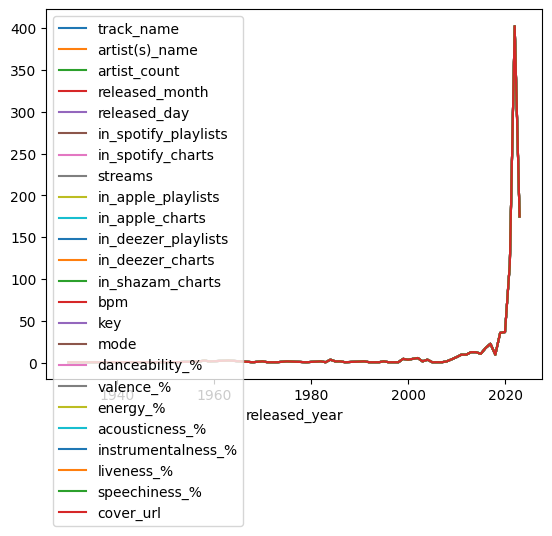

In [133]:
df_years.plot()

<Axes: >

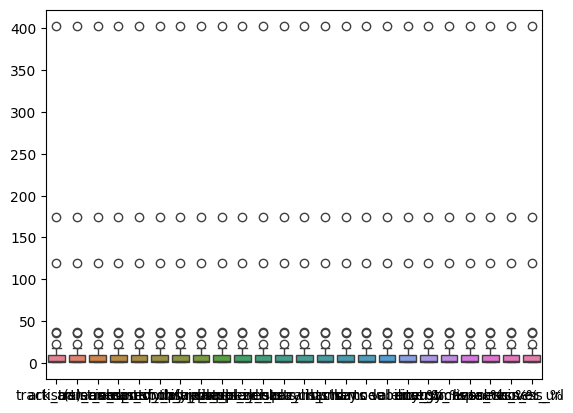

In [142]:
sns.boxplot(df_years)